In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
data=pd.read_csv("advertising.csv")
print(data.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


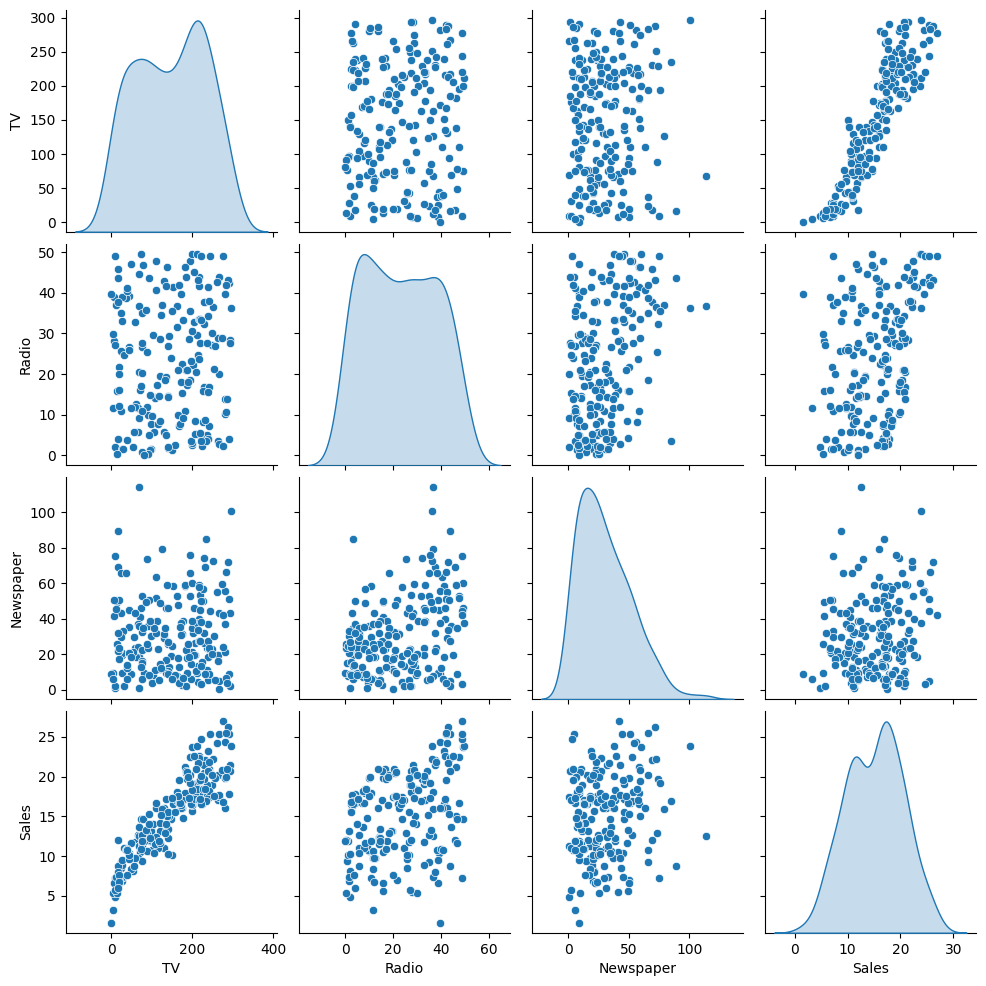

In [6]:
sns.pairplot(data, diag_kind='kde')
plt.show()

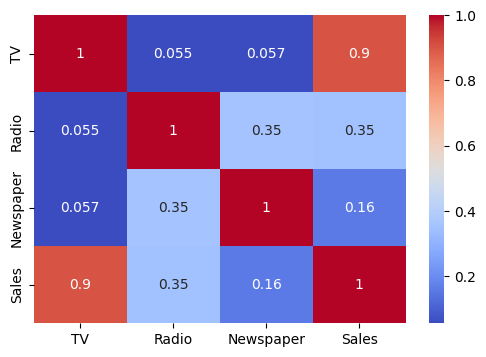

In [7]:
plt.figure(figsize=(6, 4))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [8]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred = model.predict(X_test)

In [12]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R² Score: {r2:.2f}')

Mean Absolute Error (MAE): 1.27
Mean Squared Error (MSE): 2.91
Root Mean Squared Error (RMSE): 1.71
R² Score: 0.91


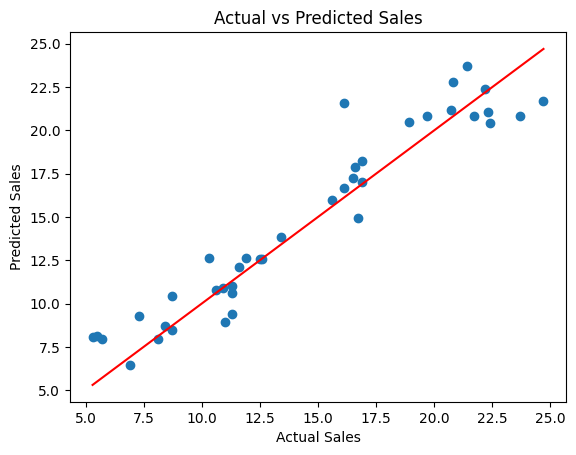

In [13]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Perfect prediction line
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

In [14]:
print(f'Coefficients: TV={model.coef_[0]:.2f}, Radio={model.coef_[1]:.2f}, Newspaper={model.coef_[2]:.2f}')
print(f'Intercept: {model.intercept_:.2f}')

Coefficients: TV=0.05, Radio=0.10, Newspaper=0.00
Intercept: 4.71


In [15]:
new_budget = np.array([[150, 30, 20]])  # Example advertising budget for TV, Radio, Newspaper
predicted_sales = model.predict(new_budget)
print(f'Predicted Sales for the new budget: {predicted_sales[0]:.2f}')

Predicted Sales for the new budget: 16.01


C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [19]:
r2 = r2_score(y_test, y_pred)
print(f'Accuracy: {r2*100}%')

Accuracy: 90.59011844150827%
